<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


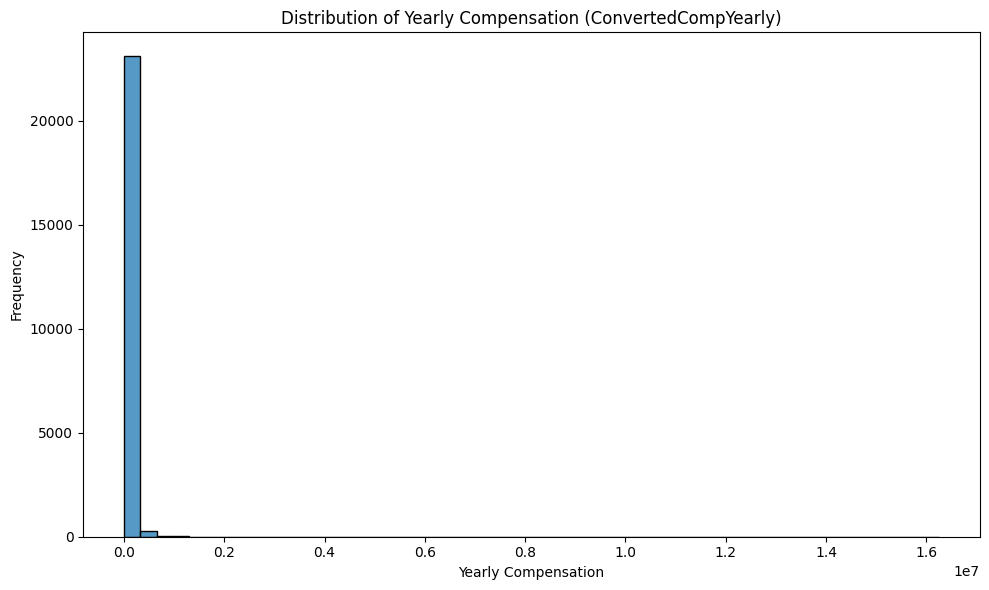

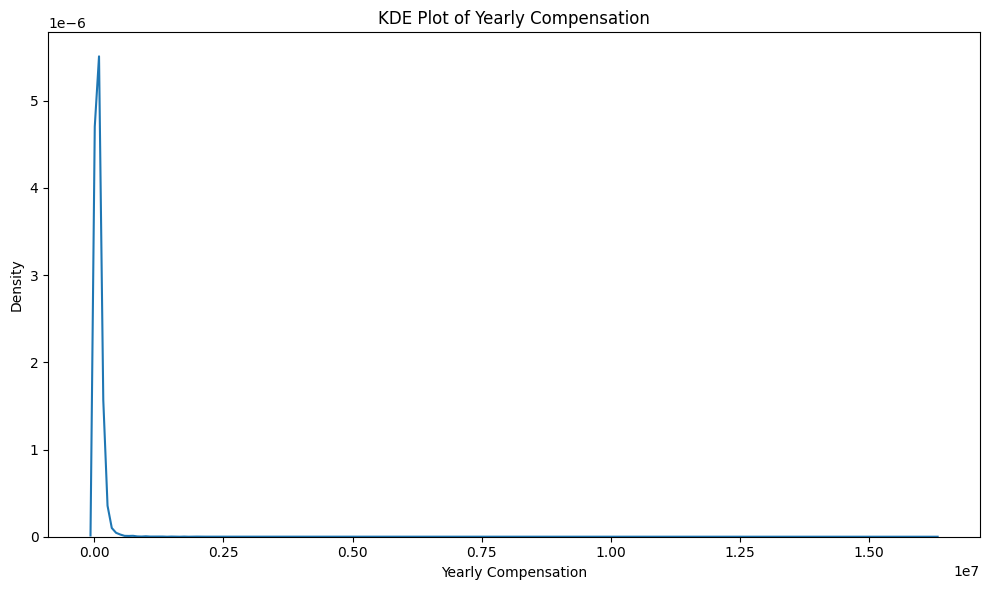

In [3]:
# Step 3: Analyze and Visualize Compensation Distribution

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure ConvertedCompYearly is numeric
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")

# Drop missing values
comp_df = df.dropna(subset=["ConvertedCompYearly"])

# ---- Histogram of yearly compensation ----
plt.figure(figsize=(10, 6))
sns.histplot(comp_df["ConvertedCompYearly"], bins=50)
plt.title("Distribution of Yearly Compensation (ConvertedCompYearly)")
plt.xlabel("Yearly Compensation")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# ---- Optional: KDE plot for smoother distribution ----
plt.figure(figsize=(10, 6))
sns.kdeplot(comp_df["ConvertedCompYearly"])
plt.title("KDE Plot of Yearly Compensation")
plt.xlabel("Yearly Compensation")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [4]:
# Step 4: Calculate Median Compensation for Full-Time Employees

import pandas as pd

# Ensure ConvertedCompYearly is numeric
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")

# Filter for full-time employed respondents
full_time_df = df[df["Employment"] == "Employed, full-time"]

# Calculate median compensation
median_comp_full_time = full_time_df["ConvertedCompYearly"].median()

print("Median yearly compensation for full-time employees:")
print(median_comp_full_time)


Median yearly compensation for full-time employees:
69814.0


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



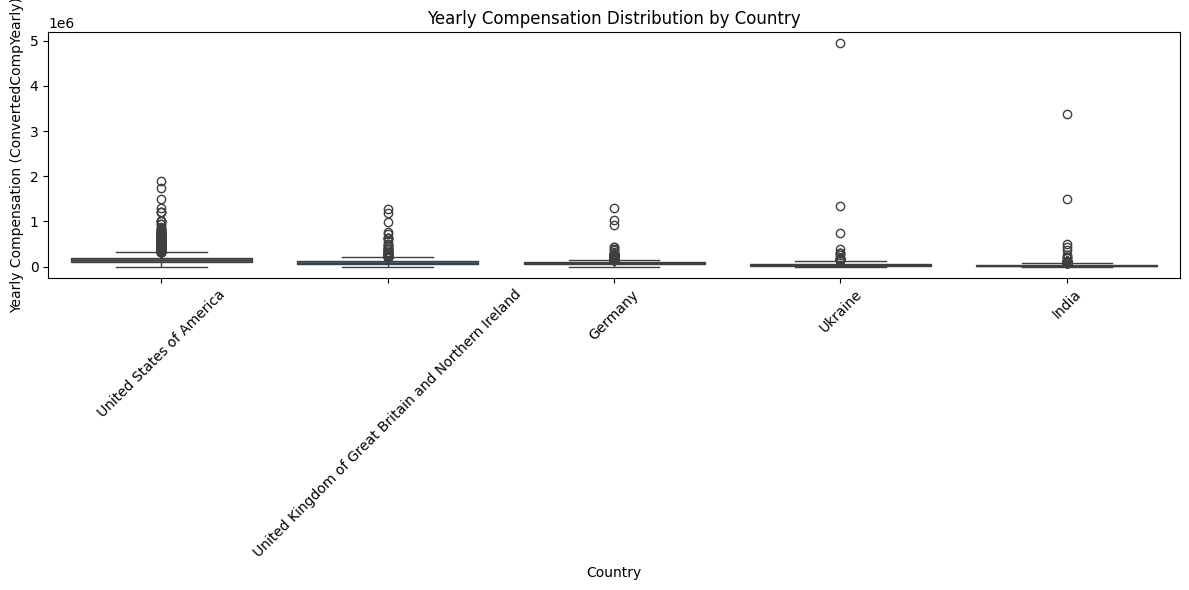

In [5]:
# Step 5: Analyze Compensation Range and Distribution by Country

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure ConvertedCompYearly is numeric
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")

# Drop rows with missing Country or compensation
country_comp_df = df.dropna(subset=["Country", "ConvertedCompYearly"])

# Limit to top 5 countries by respondent count (keeps plot readable)
top_countries = (
    country_comp_df["Country"]
    .value_counts()
    .head(5)
    .index
)

country_comp_df = country_comp_df[
    country_comp_df["Country"].isin(top_countries)
]

# ---- Box plot: Compensation by country ----
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=country_comp_df,
    x="Country",
    y="ConvertedCompYearly"
)

plt.title("Yearly Compensation Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Yearly Compensation (ConvertedCompYearly)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [6]:
# Step 6: Remove outliers from ConvertedCompYearly (IQR method)

import pandas as pd

# Ensure ConvertedCompYearly is numeric
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")

# Drop rows with missing compensation
comp_df = df.dropna(subset=["ConvertedCompYearly"])

# ---- Calculate IQR ----
Q1 = comp_df["ConvertedCompYearly"].quantile(0.25)
Q3 = comp_df["ConvertedCompYearly"].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# ---- Create refined DataFrame without outliers ----
df_refined = comp_df[
    (comp_df["ConvertedCompYearly"] >= lower_bound) &
    (comp_df["ConvertedCompYearly"] <= upper_bound)
]

# ---- Validate sizes ----
print("Original dataset size (after dropping NaNs):", comp_df.shape)
print("Refined dataset size (outliers removed):", df_refined.shape)

Original dataset size (after dropping NaNs): (23435, 114)
Refined dataset size (outliers removed): (22457, 114)


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


Correlation Matrix:
                     ConvertedCompYearly   WorkExp  JobSatPoints_1
ConvertedCompYearly             1.000000  0.153182        0.020156
WorkExp                         0.153182  1.000000       -0.028839
JobSatPoints_1                  0.020156 -0.028839        1.000000


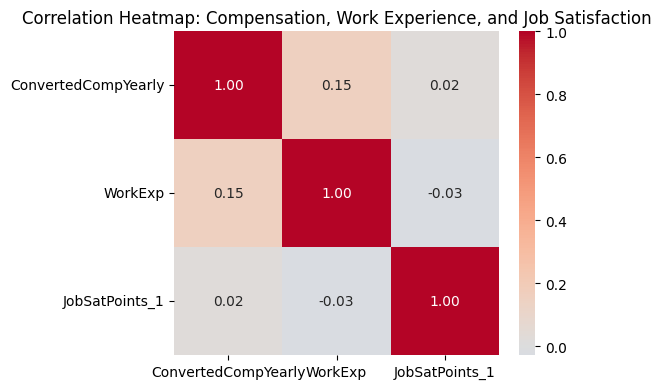

In [7]:
# Step 7: Finding Correlations Between Key Variables

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure relevant columns are numeric
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")
df["WorkExp"] = pd.to_numeric(df["WorkExp"], errors="coerce")
df["JobSatPoints_1"] = pd.to_numeric(df["JobSatPoints_1"], errors="coerce")

# Create a DataFrame with the key variables and drop missing values
corr_df = df[["ConvertedCompYearly", "WorkExp", "JobSatPoints_1"]].dropna()

# Calculate correlation matrix (Pearson by default)
corr_matrix = corr_df.corr()

print("Correlation Matrix:")
print(corr_matrix)

# ---- Visualize correlations with a heatmap ----
plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)

plt.title("Correlation Heatmap: Compensation, Work Experience, and Job Satisfaction")
plt.tight_layout()
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


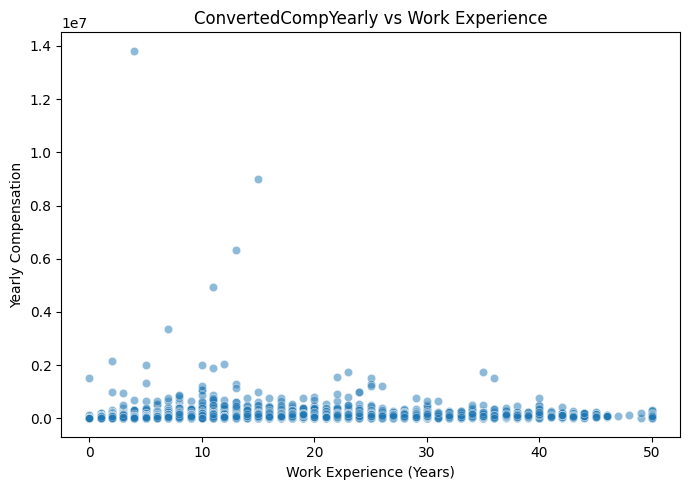

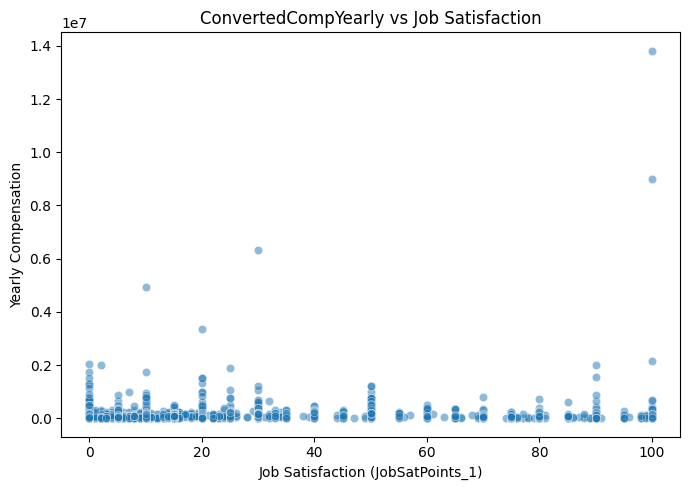

In [8]:
# Step 8: Scatter Plots for Correlations

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure relevant columns are numeric
df["ConvertedCompYearly"] = pd.to_numeric(df["ConvertedCompYearly"], errors="coerce")
df["WorkExp"] = pd.to_numeric(df["WorkExp"], errors="coerce")
df["JobSatPoints_1"] = pd.to_numeric(df["JobSatPoints_1"], errors="coerce")

# Drop rows with missing values in the relevant columns
scatter_df = df[["ConvertedCompYearly", "WorkExp", "JobSatPoints_1"]].dropna()

# ---- Scatter plot: Compensation vs Work Experience ----
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=scatter_df,
    x="WorkExp",
    y="ConvertedCompYearly",
    alpha=0.5
)
plt.title("ConvertedCompYearly vs Work Experience")
plt.xlabel("Work Experience (Years)")
plt.ylabel("Yearly Compensation")
plt.tight_layout()
plt.show()

# ---- Scatter plot: Compensation vs Job Satisfaction ----
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=scatter_df,
    x="JobSatPoints_1",
    y="ConvertedCompYearly",
    alpha=0.5
)
plt.title("ConvertedCompYearly vs Job Satisfaction")
plt.xlabel("Job Satisfaction (JobSatPoints_1)")
plt.ylabel("Yearly Compensation")
plt.tight_layout()
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
